# NumPy Operations

## Arithmetic

You can easily perform array with array arithmetic, or scalar with array arithmetic. Let's see some examples:

In [19]:
import numpy as np
arr = np.arange(0,10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
arr / arr

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [21]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [22]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Warning on division by zero, but not an error!
# Just replaced with nan
arr/arr

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [25]:
# Also warning, but not an error instead infinity
1/arr

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [26]:
arr**3

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

## Universal Array Functions

Numpy comes with many [universal array functions](http://docs.scipy.org/doc/numpy/reference/ufuncs.html), which are essentially just mathematical operations you can use to perform the operation across the array. Let's show some common ones:

In [34]:
#Taking Square Roots
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [35]:
#Calcualting exponential (e^)
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [37]:
np.max(arr) #same as arr.max()

9

In [40]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [41]:
np.log(arr)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

# Polynomial Fitting using NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0.1, 3, 20)
y = np.cos(x) + 0.1*np.random.randn(20)
t = np.linspace(0.1, 3, 100)

In [8]:
p = np.poly1d(np.polyfit(x,y, 1))
print(p)

 
-0.8093 x + 1.28


In [9]:
# Q1. What is the max degree of polynomial which can be used in this data ?? (if any)
# Q2. How do i know/judge which polynomial is the "best-fitting" polynomial ??

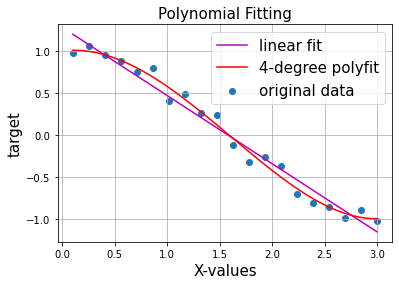

In [13]:
# fig = plt.figure(figsize=(10,6))
plt.scatter(x,y, label='original data')
plt.plot(t, p(t), 'm-', label='linear fit')

p4 = np.poly1d(np.polyfit(x,y, 4))
plt.plot(t, p4(t), '-', color='red', label='4-degree polyfit')

plt.xlabel('X-values', fontsize=15)
plt.ylabel('target', fontsize=15)
plt.title('Polynomial Fitting', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# plt.plot(x,y(t), 'r-', label='true function')

In [14]:
def mse(y,y_pred):
    return ((y-y_pred)**2).mean()

In [16]:
mse_val = mse(y,p(x))
mse_val

0.01455250249894545

In [17]:
def r2(y,y_pred):
    SSR = ((y-y_pred)**2).sum()
    SST = ((y-y.mean())**2).sum()
    return 1-(SSR/SST)

In [18]:
r2(y,p(x))

0.9721149941217299

In [22]:
mse_val = []
r2_val = []

for k in range(1,len(x)):
    p = np.poly1d(np.polyfit(x,y,k))
    mse_val.append(mse(y,p(x)))
    r2_val.append(r2(y,p(x)))
    

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


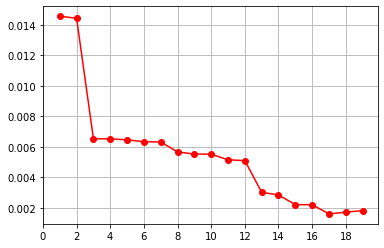

In [38]:
degree = list(range(1,len(x)))

plt.plot(degree, mse_val, 'r-o')
plt.xticks(np.arange(0,20,2))
plt.grid(True)

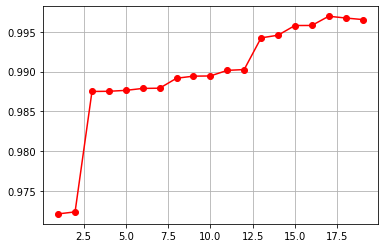

In [29]:
plt.plot(degree, r2_val, 'r-o')
plt.grid(True)

In [34]:
r2_val = np.array(r2_val)
r2_val.max(), r2_val.argmax()


(0.996944013497097, 16)